# 1 Getting Ready

## 1.1 Import Required Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import relativedelta

## 1.2 Setting up Environment

In [36]:
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# 2 Load Transformed Data

## 2.1 Load from pickle

In [37]:
df_transformed_churn = pd.read_pickle('./data/transformed/churn_transformed.pickle')

## 2.2 Have a Look into the Transformed Data

In [38]:
df_transformed_churn.head()

,CUSTOMER_ID,GENDER,TENURE,MONTHLY_CHARGES,CHURN
0,7590-VHVEG,Female,1,29.85,No
1,5575-GNVDE,Male,34,56.95,No
2,3668-QPYBK,Male,2,53.85,Yes
3,7795-CFOCW,Male,45,42.30,No
4,9237-HQITU,Female,2,70.70,Yes


## 2.3 Make a copy of Transformed to work on

In [39]:
df = df_transformed_churn.copy()

# 3 Learn more about the Dataset - Meta Info

In [40]:
df.shape

(7043, 5)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
CUSTOMER_ID        7043 non-null object
GENDER             7043 non-null object
TENURE             7043 non-null int64
MONTHLY_CHARGES    7043 non-null float64
CHURN              7043 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 275.2+ KB


In [42]:
df.columns

Index(['CUSTOMER_ID', 'GENDER', 'TENURE', 'MONTHLY_CHARGES', 'CHURN'], dtype='object')

In [43]:
df.describe()

,TENURE,MONTHLY_CHARGES
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


# 4 Univariate Analysis

For each and every variable

## 4.1 CUSTOMER_ID

In [44]:
df.CUSTOMER_ID.head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: CUSTOMER_ID, dtype: object

In [45]:
df.CUSTOMER_ID.isna().sum()

0

In [46]:
len(df.CUSTOMER_ID.unique())

7043

#### CUSTOMER_ID is not important for Machine Learning Input, but we are not dropping it now. Because this keeps a traceability of Data

## 4.2 TENURE

In [47]:
df.TENURE.head()

0     1
1    34
2     2
3    45
4     2
Name: TENURE, dtype: int64

In [48]:
df.TENURE.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: TENURE, dtype: float64

In [49]:
df.TENURE.isna().sum()

0

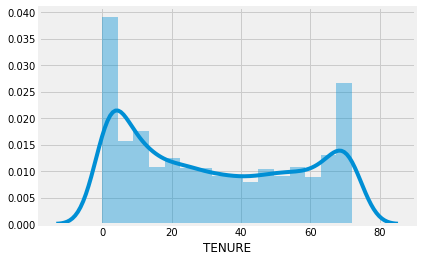

In [50]:
sns.distplot(df.TENURE, axlabel='TENURE');

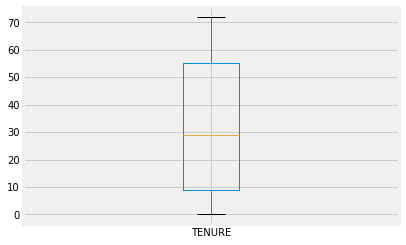

In [51]:
df.boxplot(column='TENURE', return_type='axes')

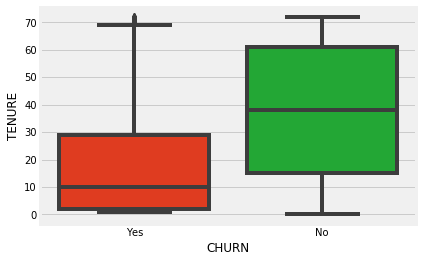

In [52]:
status_order = ['Yes','No']
status_palette = ["#ff2600","#0dbd25"]
color_reg = "#0dbd25"
color_churn = "#ff2600"

sns.boxplot(x='CHURN', y='TENURE', data=df, order=status_order, palette = status_palette)
plt.show()

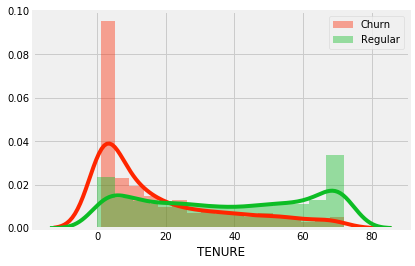

In [53]:
df_reg = df[df.CHURN == 'No']
df_churn = df[df.CHURN == 'Yes']

sns.distplot(df_churn.TENURE, label='Churn', color=color_churn)
sns.distplot(df_reg.TENURE, label='Regular', color=color_reg)
plt.legend(labels=['Churn','Regular'])
plt.show()

TENURE Seems important!

## 4.3 MONTHLY_CHARGES

In [54]:
df.MONTHLY_CHARGES.head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MONTHLY_CHARGES, dtype: float64

In [55]:
df.MONTHLY_CHARGES.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MONTHLY_CHARGES, dtype: float64

In [56]:
df.MONTHLY_CHARGES.isna().sum()

0

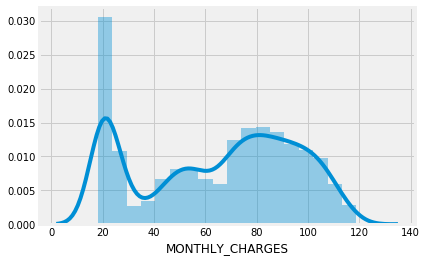

In [57]:
sns.distplot(df.MONTHLY_CHARGES, axlabel='MONTHLY_CHARGES');

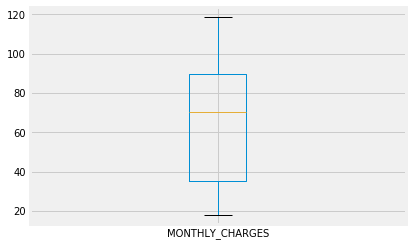

In [58]:
df.boxplot(column='MONTHLY_CHARGES', return_type='axes')

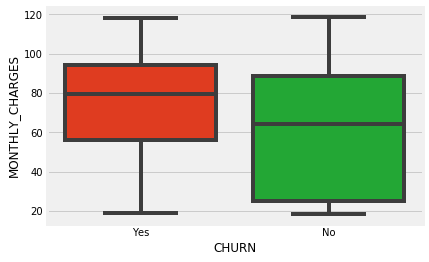

In [59]:
status_order = ['Yes','No']
status_palette = ["#ff2600","#0dbd25"]
color_reg = "#0dbd25"
color_churn = "#ff2600"

sns.boxplot(x='CHURN', y='MONTHLY_CHARGES', data=df, order=status_order, palette = status_palette)
plt.show()

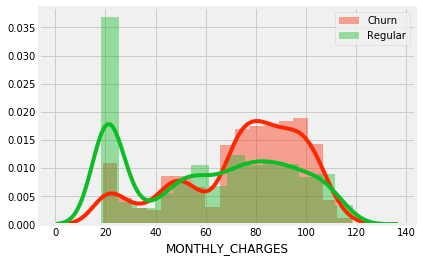

In [60]:
df_reg = df[df.CHURN == 'No']
df_churn = df[df.CHURN == 'Yes']

sns.distplot(df_churn.MONTHLY_CHARGES, label='Churn', color=color_churn)
sns.distplot(df_reg.MONTHLY_CHARGES, label='Regular', color=color_reg)
plt.legend(labels=['Churn','Regular'])
plt.show()

MONTHLY_CHARGES Seems to be important

## 4.4 CHURN

In [61]:
df.CHURN.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: CHURN, dtype: object

In [62]:
df.CHURN.describe(include=["object"])

count     7043
unique       2
top         No
freq      5174
Name: CHURN, dtype: object

In [63]:
df.CHURN.value_counts().sort_index()

No     5174
Yes    1869
Name: CHURN, dtype: int64

In [64]:
df.CHURN.isna().sum()

0

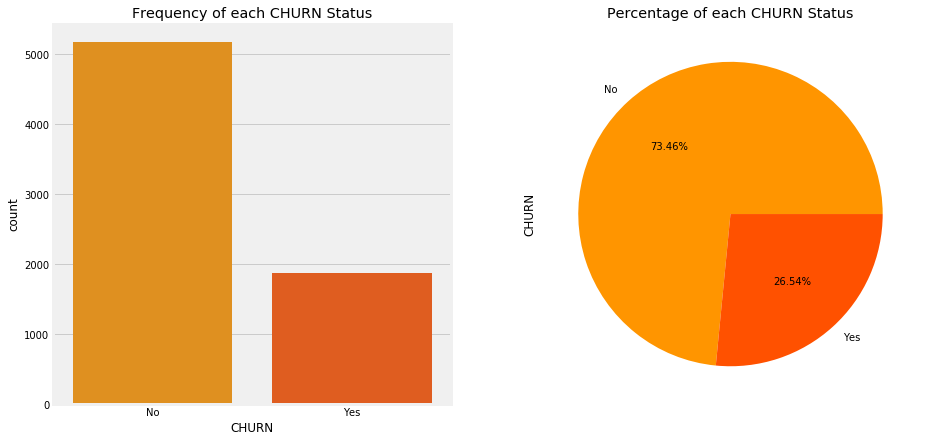

In [65]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

churn_palette = ['#ff9500','#ff5100']
sns.countplot(x='CHURN',data=df,ax=axs[0],palette=churn_palette)
axs[0].set_title("Frequency of each CHURN Status")

df.CHURN.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%', colors = churn_palette)
axs[1].set_title("Percentage of each CHURN Status")

plt.show()

In [66]:
churn_map={'Yes':1, 'No':0}
df["CHURN_STATUS"] = df["CHURN"].map(churn_map)

In [67]:
df.head()

,CUSTOMER_ID,GENDER,TENURE,MONTHLY_CHARGES,CHURN,CHURN_STATUS
0,7590-VHVEG,Female,1,29.85,No,0
1,5575-GNVDE,Male,34,56.95,No,0
2,3668-QPYBK,Male,2,53.85,Yes,1
3,7795-CFOCW,Male,45,42.30,No,0
4,9237-HQITU,Female,2,70.70,Yes,1


## 4.5 GENDER

In [68]:
df.GENDER.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: GENDER, dtype: object

In [69]:
df.GENDER.dtype

dtype('O')

In [70]:
df.GENDER.describe(include=["object"])

count     7043
unique       2
top       Male
freq      3555
Name: GENDER, dtype: object

In [71]:
df.GENDER.value_counts().sort_index()

Female    3488
Male      3555
Name: GENDER, dtype: int64

In [72]:
df.GENDER.isna().sum()

0

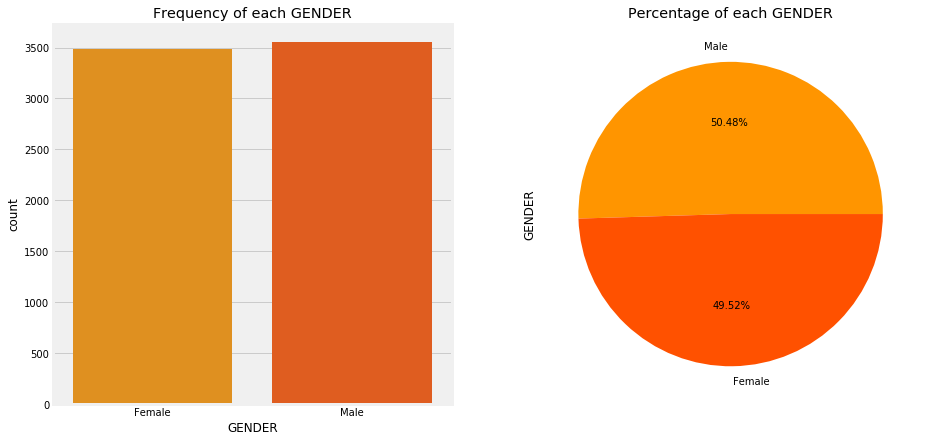

In [73]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

gender_palette = ['#ff9500','#ff5100']
sns.countplot(x='GENDER',data=df,ax=axs[0],palette=gender_palette)
axs[0].set_title("Frequency of each GENDER")

df.GENDER.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%', colors = gender_palette)
axs[1].set_title("Percentage of each GENDER")

plt.show()

In [78]:
def draw_ratio_graph(dataset, first_param, second_param='CHURN'):
    second_param = dataset[second_param]
    dataset_grp = dataset.groupby([first_param, second_param])
    df_new = dataset_grp.size().unstack()
    df_new = df_new.fillna(0)
    df_new['default_ratio'] = df_new.apply(lambda x:  100 * x['Yes']/x.sum(), axis=1)
    print(df_new)
    df_final = df_new.drop(columns=["Yes", "No"])
    df_final.plot(kind="bar", stacked=True, figsize=[16,6], colormap='winter',title="default ratio")

CHURN     No  Yes  default_ratio
GENDER                          
Female  2549  939      26.920872
Male    2625  930      26.160338


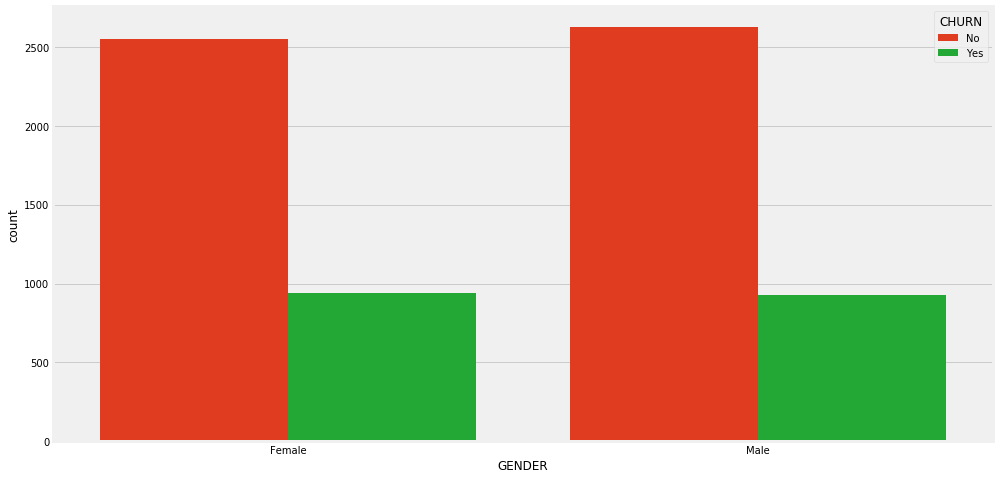

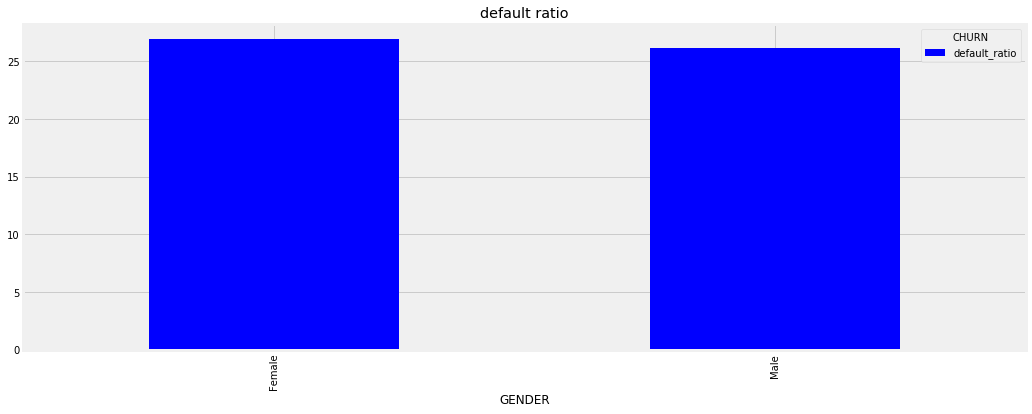

In [79]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df['GENDER'], 
                   hue = df.CHURN,
                   palette=status_palette,
                   data=df)
draw_ratio_graph(df, df['GENDER'])

In [80]:
df=df[df.GENDER.notnull()]

In [81]:
df.shape

(7043, 6)

# 5 Output for an input for EDA Dummyfication Phase

## 5.1 Save as Pickle

In [82]:
df.to_pickle('./data/eda/churn_eda.pickle')